In [1]:
%pylab inline
import matplotlib.pyplot as plc
import combimuscle
import activation_signal
import muscle_utils
import numpy as np
import scipy as sc

Populating the interactive namespace from numpy and matplotlib


In [2]:
emg=np.genfromtxt("/home/bjarkenrp/Dropbox/exo-arm/logs/emg_logs/mr_morten/mr_morten_flex_isokinetic_3rep/emg-1485951230.csv", delimiter=',')

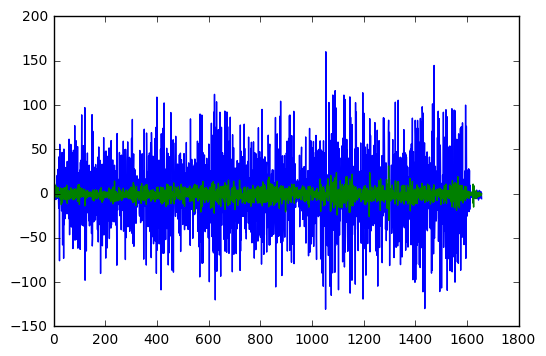

In [9]:
emg4=emg[300:-300,4]
emg4
#plc.plot(emg4)
emg8=emg[300:-300,8]
#plc.plot(emg8)

emg4=sc.signal.resample(emg4,1658)
emg8=sc.signal.resample(emg8,1658)
plc.plot(emg4)
plc.plot(emg8)

a_lowerarm =[0]*1658 

In [14]:
C1 = -0.033
C2 = -0.019
A = -0.02
d = 0.05 

a4 = activation_signal.ActivationSignal(C1, C2, A, d)
a8 = activation_signal.ActivationSignal(C1, C2, A, d)


In [22]:
kinkom=np.genfromtxt("/home/bjarkenrp/Dropbox/exo-arm/logs/kincom_logs/morten/MRF1_clean", delimiter=',')

In [7]:
angle=abs(kinkom[100:-20,1])
angle
#plc.plot(angle)
len(angle)

1658

In [32]:
tau = []
a4_vec = []
for a, e4, e8 in zip(angle, emg4, emg8):
    activation_level = [
        a4.new_measurement(e4),
        0,
        a4.get_activation_level(),
        a8.new_measurement(e8)
    ]
    angs = [a, 0]
    a4_vec.append(a4.get_activation_level())
    tau.append(combimuscle.get_comb_tau(angs, activation_level, muscle_utils.MUSCLE_JOINT.ELBOW))


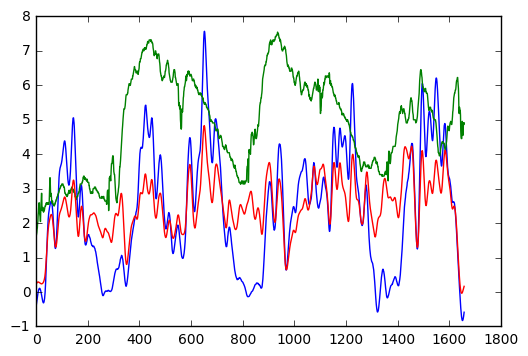

In [39]:
plt.plot(tau)
plt.plot(kinkom[100:-20,3] * 1/22)
plt.plot([a*10 for a in a4_vec])